In [1]:
import sys
sys.executable

'c:\\Users\\Lenovo\\AppData\\Local\\Programs\\Python\\Python39\\python.exe'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()

# remove warnings
import warnings
warnings.simplefilter('ignore')


## 1. Thu thập dữ liệu

Đây là bộ dữ liệu lịch sử về Thế vận hội Olympic hiện đại, bao gồm tất cả các Thế vận hội từ Athens 1896 đến Rio 2016.
Lưu ý rằng Thế vận hội Mùa đông và Mùa hè được tổ chức trong cùng một năm cho đến năm 1992. Sau đó, họ so le chúng để Thế vận hội Mùa đông diễn ra theo chu kỳ bốn năm bắt đầu từ năm 1994, sau đó là Mùa hè năm 1996, rồi Mùa đông năm 1998, v.v. . Một sai lầm phổ biến mà mọi người mắc phải khi phân tích dữ liệu này là cho rằng Thế vận hội Mùa hè và Mùa đông luôn được sắp xếp so le.

## 2. Khám phá dữ liệu

### Đọc dữ liệu từ file csv vào dataframe

In [3]:
ethlete_df = pd.read_csv('athlete_events.csv')
ethlete_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### Dữ liệu gồm có bao nhiêu dòng và bao nhiêu cột?

Tính số dòng và số cột (không được code cứng con số) và lần lượt lưu vào 2 biến là `num_rows` và `num_cols`. 

In [4]:
num_rows=len(ethlete_df)
print("Num rows: ",num_rows)
num_cols=len(ethlete_df.iloc[0])
print("Num cols: ",num_cols)

Num rows:  271116
Num cols:  15


### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Theo mô tả dữ liệu của trang web `www.sports-reference.com` và theo quan sát sơ bộ về dữ liệu thì một dòng cho biết thông tin của một vận động viên tham gia Thế vận hội Mùa đông và Mùa hè. Có vẻ không có dòng nào bị "lạc loài".

### Dữ liệu có các dòng bị lặp không?

Ta sẽ kiểm tra vụ này và lưu kết quả vào biến `have_duplicated_rows`. Biến này sẽ có giá trị True nếu dữ liệu có các dòng bị lặp và có giá trị False nếu ngược.

In [5]:
have_duplicated_rows=len(ethlete_df.index)-len(ethlete_df.index.drop_duplicates())
assert have_duplicated_rows == False

Kết quả kiểm tra cho thấy không có dòng nào là bị trùng lắp dữ liệu cả.

### Mỗi cột có ý nghĩa gì?

Dưới đây là phần mô tả của trang web `www.sports-reference.com` về các cột trong file "ethlete_event.csv":
- **ID**: Chỉ số duy nhất cho mỗi vận động viên.
- **Name**: Tên của vận động viên tham dự.
- **Sex**: Giới tính của vận động viên tham dự.
- **Age**: Tuổi của vận động viên tham dự .
- **Weight**: Cân nặng của vận động viên tham dự.
- **Team**: Tên đội của vận động viên tham dự.
- **NOC**: Ủy ban Olympic quốc gia.
- **Games**: Tên của Thế vận hội vận động viên tham dự.
- **Year**: Năm tổ chức Thế vận hội vận.
- **Season**: Mùa tổ chức Thế vận hội vận.
- **City**: Thành phố tổ chức Thế vận hội vận.
- **Sport**: Môn thi đấu của vận động viên.
- **Event**: Nội dung thi đấu vận động viên.
- **Medal**: Huy chương vận động viên đạt được.

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

Ta lấy cột ID làm index cho `ethlete_df` 

In [6]:
ethlete_df.set_index('ID',inplace=True)

Ta lấy `dtype` (kiểu dữ liệu của mỗi phần tử) của mỗi cột trong `ethlete_df` và lưu kết quả vào series `col_dtypes`; series này có index là tên cột. 

In [7]:
col_dtypes = pd.Series(ethlete_df.dtypes,index = ethlete_df.columns)
display(col_dtypes)

Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

**Vấn đề cần tiền xử lý:**

- Cột "Year" đang có dtype là `int64`. Để có thể tiếp tục khám phá thêm về cột này, ta sẽ thực hiện bước tiền xử lý là chuyển sang dạng `datetime`.

In [8]:
ethlete_df['Year'] = pd.to_datetime(ethlete_df['Year'], format='%Y')

In [9]:
assert ethlete_df.dtypes['Year']==np.dtype('datetime64[ns]')

In [10]:
# Nếu dtype của cột "Date" đã được chuyển sang datetime thì phải dùng được .dt.
assert ethlete_df['Year'].dt.year.min() == 1896

### Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào?

Ngoài cột ID được đặt thành index cho dataframe, hiện có 3 cột có vẻ là thuộc nhóm numeric: "Age", "Height", "Weight". 

Với mỗi cột numeric bạn sẽ tính tỉ lệ % giá trị thiếu (từ 0 đến 100), min, max. Ta lưu kết quả vào dataframe `nume_col_profiles_df`. Dataframe này có 3 dòng là "missing_ratio", "min", "max"; và có 3 cột là "Age", "Height", "Weight".   

In [11]:
# YOUR CODE HERE
nume_col_profiles_df={
    'Age':[(ethlete_df['Age'].isna().sum()/len(ethlete_df)*100).round(1),ethlete_df['Age'].min(),ethlete_df['Age'].max()],
    'Height':[(ethlete_df['Height'].isna().sum()/len(ethlete_df)*100).round(1),ethlete_df['Height'].min()*1.0,ethlete_df['Height'].max()*1.0],
    'Weight':[(ethlete_df['Weight'].isna().sum()/len(ethlete_df)*100).round(3),ethlete_df['Weight'].min().round(3),ethlete_df['Weight'].max().round(3)],
}
nume_col_profiles_df=pd.DataFrame(nume_col_profiles_df,index = ['missing_ratio', 'min', 'max'])


In [12]:
display(nume_col_profiles_df)

,Age,Height,Weight
missing_ratio,3.5,22.2,23.191
min,10.0,127.0,25.000
max,97.0,226.0,214.000


Wow, ta nhận thấy có những vận động viên rất đặt biệt.

In [13]:
num_country=ethlete_df['Team']
display(num_country)

ID
1                  China
2                  China
3                Denmark
4         Denmark/Sweden
5            Netherlands
               ...      
135569          Poland-1
135570            Poland
135570            Poland
135571            Poland
135571            Poland
Name: Team, Length: 271116, dtype: object

## 3. Đưa ra các câu hỏi có ý nghĩa cần trả lời

Sau khi đã khám phá dữ liệu và hiểu hơn về dữ liệu, ta thấy có một số câu hỏi có thể được trả lời bằng dữ liệu:
- Top 5 vận động viên tham gia nhiều năm Thế vận hội nhất?
    
        Ý nghĩa: với câu hỏi trên, ta biết được những vận động viên xuất sắc nhất được quốc gia mình nhiều năm cử đi đại diện tham gia Thế vận hội. Có thể, ban tổ chức sẽ có một giải thưởng là "Tuyên dương những vận động viên có số lần tham gia nhiều nhất lịch sử." :"))

- Top 5 vận động viên đạt nhiều huy chương nhất?
    
        Ý nghĩa: với câu hỏi trên, ta biết được những vận động viên xuất sắc nhất đã giành được nhiều huy chương về cho quốc gia mình. Có thể, ban tổ chức sẽ có một giải thưởng là "Tuyên dương những vận động viên đạt được nhiều thành tích nhất lịch sử." :"))

## 4. Tiền xử lý và phân tích dữ liệu để trả lời cho từng câu hỏi

### Top 5 vận động viên tham gia nhiều năm Thế vận hội nhất?

Để trả lời cho câu hỏi này, ta sẽ làm như sau:
- Bước 1: Tính số lượng năm Thế vận hội mà mỗi vận động viên tham gia, chọn ra top 5 người có số lượng tham gia nhiều nhất. Ta lưu kết quả vào series `num_year_participate`, trong đó index là tên vận động viên.
- Bước 2: Từ kết quả ở trên, ta vẽ đồ thị dạng cột, trong đó trục hoành là tên và trục tung là số lượng năm tham gia.Ta đặt tên trục hoành là "Year" và tên trục tung là "Nums_part".

Code bước 1. 

In [14]:
years_part= ethlete_df.groupby(['Name',ethlete_df['Year'].dt.year]).size()
years_part=years_part.reset_index()
years_part=years_part.groupby('Name').size()
years_part=years_part.reset_index()
num_year_participate=years_part.sort_values(by=[0],ascending=False).head()
display(num_year_participate)

,Name,0
50684,Ian Millar,10
50177,Hubert Raudaschl,9
1465,Afanasijs Kuzmins,9
74851,Lesley Allison Thompson-Willie,8
94058,Nino Salukvadze (-Machavariani),8


Code bước 2. 

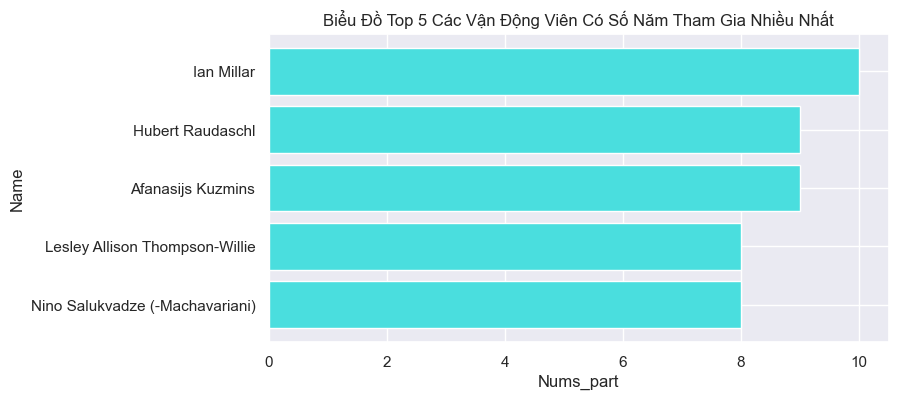

In [15]:
plt.figure(figsize=(8, 4))
ax=plt.barh(num_year_participate['Name'],num_year_participate[0],color="#4ADEDE")
plt.xlabel('Nums_part')
plt.ylabel('Name')
plt.title('Biểu Đồ Top 5 Các Vận Động Viên Có Số Năm Tham Gia Nhiều Nhất')
plt.gca().invert_yaxis()

### Top 5 vận động viên đạt nhiều huy chương nhất?

Để trả lời cho câu hỏi này, ta sẽ làm như sau:
- Bước 1: Tính số lượng huy chương theo từng loại Gold, Silver, Bronze của các vận động viên. Chọn ra top 5 người có tổng số huy chương nhiều nhất. Ta lưu kết quả vào series `num_medal_reward`.
- Bước 2: Từ kết quả ở trên, ta vẽ group stack bar chart, trong đó trục hoành là số lượng huy chương và trục tung là tên .Ta đặt tên trục hoành là "Nums_medal" và tên trục tung là "Name".

Code bước 1. 

In [16]:
num_medal_reward=ethlete_df.groupby(['Name', 'Medal']).size()
num_medal_reward=num_medal_reward.reset_index()
num_medal_reward = num_medal_reward.pivot_table(index="Name", columns="Medal",values=0, fill_value=0)
num_medal_reward['sum_cols'] = num_medal_reward.sum(axis=1)
num_medal_reward = num_medal_reward.sort_values('sum_cols' , ascending=False)
num_medal_reward = num_medal_reward.drop(columns='sum_cols').head()
columns_titles = ["Bronze","Silver","Gold"]
num_medal_reward=num_medal_reward.reindex(columns=columns_titles)
display(num_medal_reward)

Medal,Bronze,Silver,Gold
Name,,,
"Michael Fred Phelps, II",2,3,23
Larysa Semenivna Latynina (Diriy-),4,5,9
Nikolay Yefimovich Andrianov,3,5,7
Borys Anfiyanovych Shakhlin,2,4,7
Takashi Ono,4,4,5


Code bước 2. 

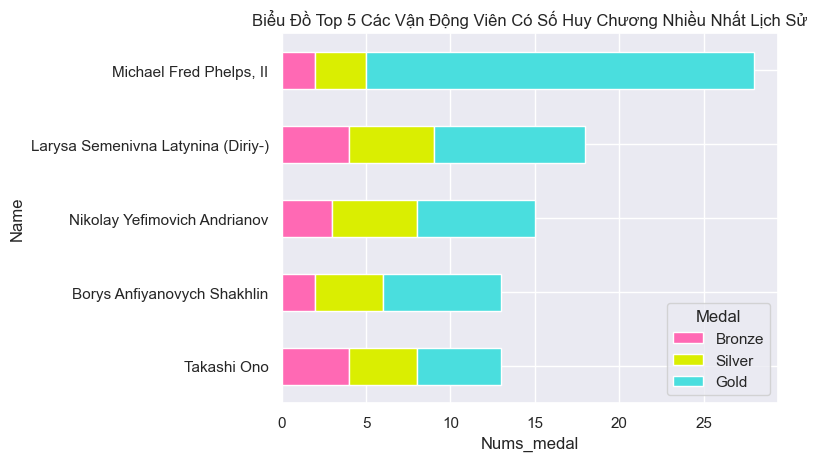

In [17]:
ax = num_medal_reward.plot.barh(color=["#FF69B4","#DAEE01","#4ADEDE"],stacked=True)
plt.xlabel('Nums_medal')
plt.ylabel('Name')
plt.title('Biểu Đồ Top 5 Các Vận Động Viên Có Số Huy Chương Nhiều Nhất Lịch Sử')
plt.gca().invert_yaxis()